In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tifffile as tf
from scipy.ndimage import fourier_shift
from scipy.signal import fftconvolve

In [2]:
def calculate_phase_correlation_map(image1, image2):
    # Perform Fourier shift on image2
    shift = np.fft.ifftshift(np.array(np.unravel_index(np.argmax(np.abs(fftconvolve(image1, np.conj(image2), mode='same')), axis=None), image1.shape)))
    shifted_fft = fourier_shift(np.fft.fftn(image2), shift)
    shifted_image = np.fft.ifftn(shifted_fft).real

    # Compute the cross-correlation
    cross_correlation = np.fft.ifft2(np.fft.fft2(image1) * np.fft.fft2(shifted_image).conj())
    
    #get the real part and normalize the cross-correlation and return
    return cross_correlation.real/cross_correlation.real.max()

In [3]:
#get suite2p outputs
datafolder = "/media/zilong/4TB Storage HDD/2PImaging/183_03082023"
processed_datafolder = os.path.join(datafolder, 'UnrotTiff/suite2p/plane0')
ops =  np.load(os.path.join(processed_datafolder, 'ops.npy'), allow_pickle=True)
ops = ops.item()

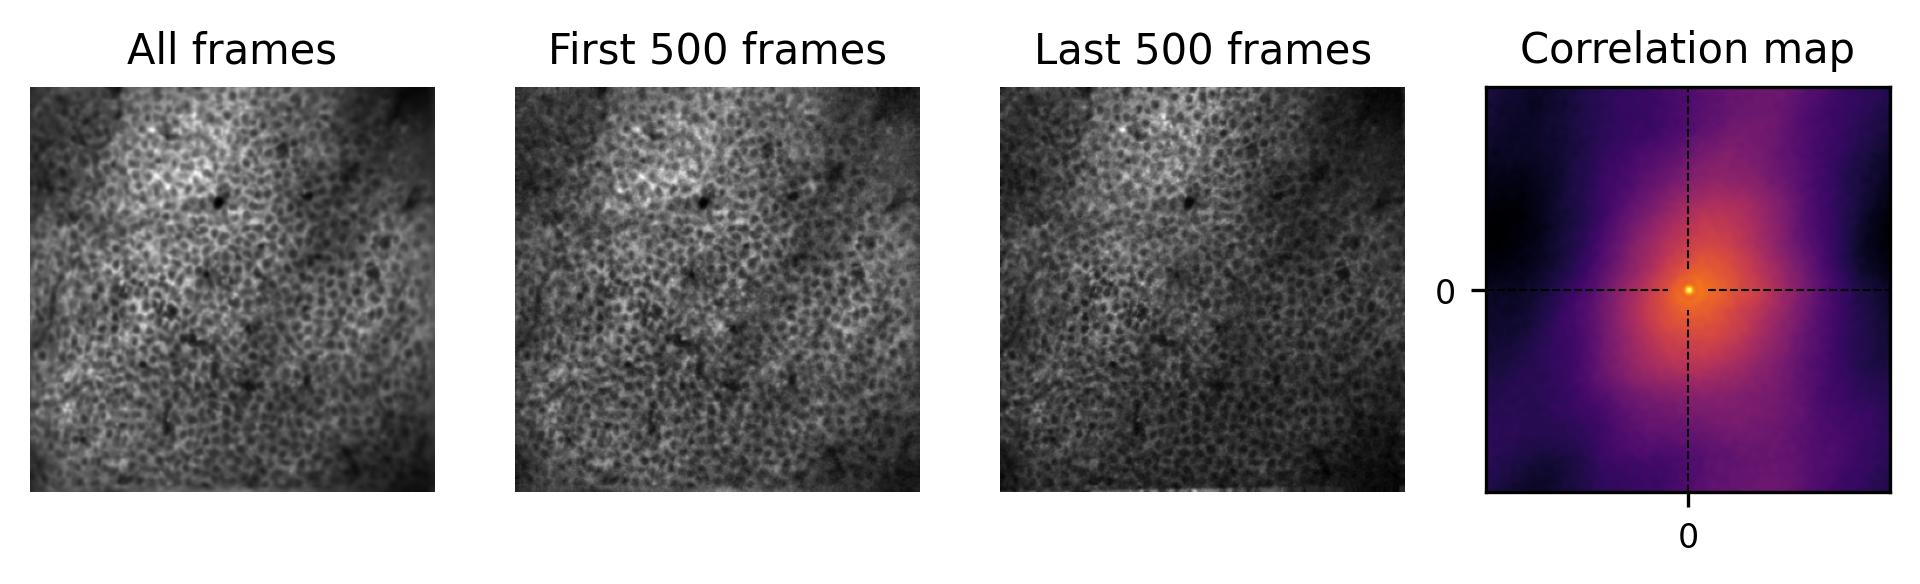

In [4]:
#show meanImage from first tiff and last tiff and all
#first tiff
RegTif_folder = os.path.join(datafolder, 'UnrotTiff/suite2p/plane0/reg_tif')

filename_tif0 = 'file000_chan0.tif'
# Load the registered tiff image
images = []
with tf.TiffFile(os.path.join(RegTif_folder, filename_tif0)) as tif:
    for page in tif.pages:
        image = page.asarray()
        images.append(image)
#get the mean image
meanImage_tif0 = np.mean(images, axis=0)
#convert to int16
meanImage_tif0 = meanImage_tif0.astype(np.int16)   

filename_tifN = 'file90000_chan0.tif'     
# Load the registered tiff image
images = []
with tf.TiffFile(os.path.join(RegTif_folder, filename_tifN)) as tif:
    for page in tif.pages:
        image = page.asarray()
        images.append(image)
#get the mean image
meanImage_tifN = np.mean(images, axis=0)
#convert to int16
meanImage_tifN = meanImage_tifN.astype(np.int16)
        
labelsize = 10
ticksize = 8
fig, axs = plt.subplots(1,4, figsize=(8,2), dpi=300)

#plot the mean of all frames
axs[0].imshow(ops['meanImg'], cmap='gray')
axs[0].set_xticks([]); axs[2].set_yticks([])
axs[0].axis('off')
axs[0].set_title('All frames', fontsize=labelsize)

#plot the mean of first 500 frames
axs[1].imshow(meanImage_tif0, cmap='gray')
axs[1].set_xticks([]); axs[0].set_yticks([])
axs[1].axis('off')
axs[1].set_title('First 500 frames', fontsize=labelsize)

#plot the mean of last 500 frames
axs[2].imshow(meanImage_tifN, cmap='gray')
axs[2].set_xticks([]); axs[1].set_yticks([])
axs[2].axis('off')
axs[2].set_title('Last 500 frames', fontsize=labelsize)

#perform phase correlation map of meanImage_tif0 and meanImage_tifN 
correlation_map = calculate_phase_correlation_map(meanImage_tif0, meanImage_tifN)
#plot the correlation map
axs[3].imshow(correlation_map, cmap='inferno')
#add x=half width and y=half height reference lines as dashed black lines using axhline and axvline
half_width = correlation_map.shape[1]/2
half_height = correlation_map.shape[0]/2

axs[3].axhline(y=half_height, xmin=0, xmax=0.45, color='black', linestyle='--', linewidth=0.5)
axs[3].axhline(y=half_height, xmin=0.55, xmax=1, color='black', linestyle='--', linewidth=0.5)
axs[3].axvline(x=half_width, ymin=0, ymax=0.45, color='black', linestyle='--', linewidth=0.5)
axs[3].axvline(x=half_width, ymin=0.55, ymax=1, color='black', linestyle='--', linewidth=0.5)

axs[3].set_xticks([half_width]); axs[3].set_xticklabels(['0'], size=ticksize)
axs[3].set_yticks([half_height]); axs[3].set_yticklabels(['0'], size=ticksize)

#title
axs[3].set_title('Correlation map', fontsize=labelsize)


#asve the figure
plt.savefig(os.path.join(datafolder,'UnrotTiff', '2D2P','meanImageFirst500&Last500&All.pdf'), dpi=300, bbox_inches='tight')

(346, 346)

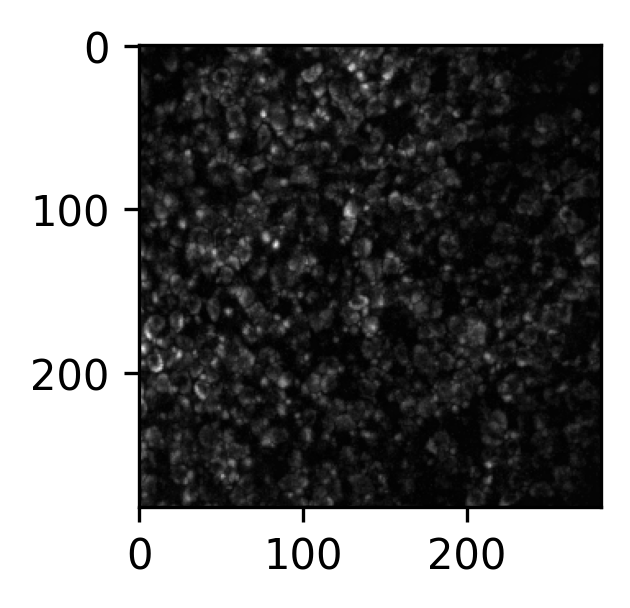

In [10]:
#get the max_proj
max_proj = ops['max_proj']
#show the max_proj
plt.figure(figsize=(2,2), dpi=300)
plt.imshow(max_proj, cmap='gray')